In [1]:
# Step - 1 Loading the librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import timedelta

In [2]:
# setp -2 Data loading
data = pd.read_csv("D:/Study/Data Science/Python/Data Set/Capstone Project - Walmart/Walmart DataSet.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# step -3 EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Convert Date column to correct data time format

data["Date"]=pd.to_datetime(data["Date"], dayfirst=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [7]:
# Check for null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# Check for duplicate value
data.duplicated().sum()

0

# Q1. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [9]:
# Create an empty dictionary to store correlation for each store
store_correlation = {}

# Loop through each unique store
for store in data['Store'].unique():
    # Filter data for the current store
    store_data = data[data['Store'] == store]
    
    # Calculate the correlation between Weekly Sales and Unemployment for this store
    correlation = store_data['Weekly_Sales'].corr(store_data['Unemployment'])
    
    # Save the correlation value for this store
    store_correlation[store] = correlation

# Convert the store correlation data into a DataFrame (for easier reading)
correlation_data = pd.DataFrame(list(store_correlation.items()), columns=['Store', 'Sales_Unemployment_Correlation'])

# Sort the stores by their correlation (negative means sales decrease as unemployment increases)
sorted_stores = correlation_data.sort_values(by='Sales_Unemployment_Correlation')

# Filter out stores where the correlation is negative (suffering the most)
most_affected_stores = sorted_stores[sorted_stores['Sales_Unemployment_Correlation'] < 0]

# Show the most affected stores
print("Stores most affected by unemployment (negative correlation):")
print(most_affected_stores)

Stores most affected by unemployment (negative correlation):
    Store  Sales_Unemployment_Correlation
37     38                       -0.785290
43     44                       -0.780076
38     39                       -0.384681
41     42                       -0.356355
40     41                       -0.350630
3       4                       -0.337015
16     17                       -0.263600
2       3                       -0.230413
36     37                       -0.221287
4       5                       -0.207043
42     43                       -0.201954
8       9                       -0.191534
12     13                       -0.171633
6       7                       -0.165382
39     40                       -0.112528
31     32                       -0.099455
0       1                       -0.097955
19     20                       -0.095341
22     23                       -0.077169
15     16                       -0.070864
25     26                       -0.066899
30     31      

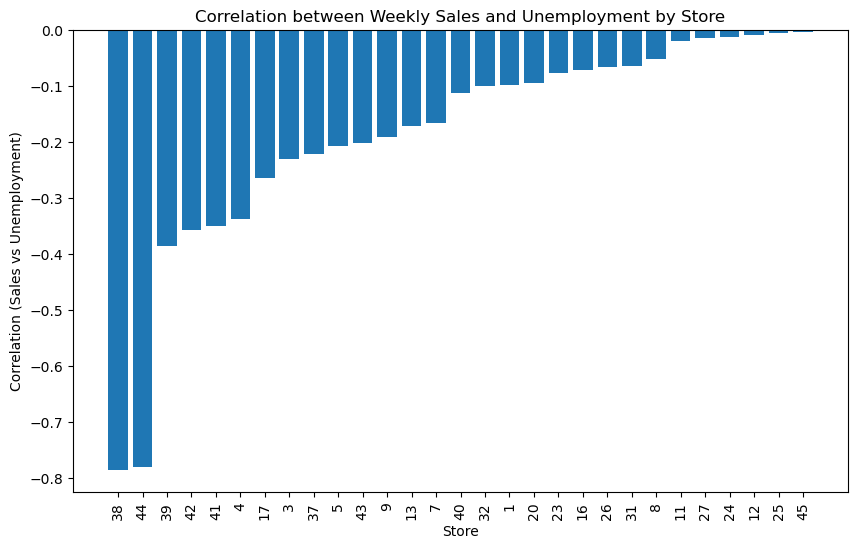

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(most_affected_stores['Store'].astype(str), most_affected_stores['Sales_Unemployment_Correlation'])
plt.title('Correlation between Weekly Sales and Unemployment by Store')
plt.xlabel('Store')
plt.ylabel('Correlation (Sales vs Unemployment)')
plt.xticks(rotation=90)
plt.show()

 - Answer: Store 38 

# Q2. If the weekly sales show a seasonal trend, when and what could be the reason?

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

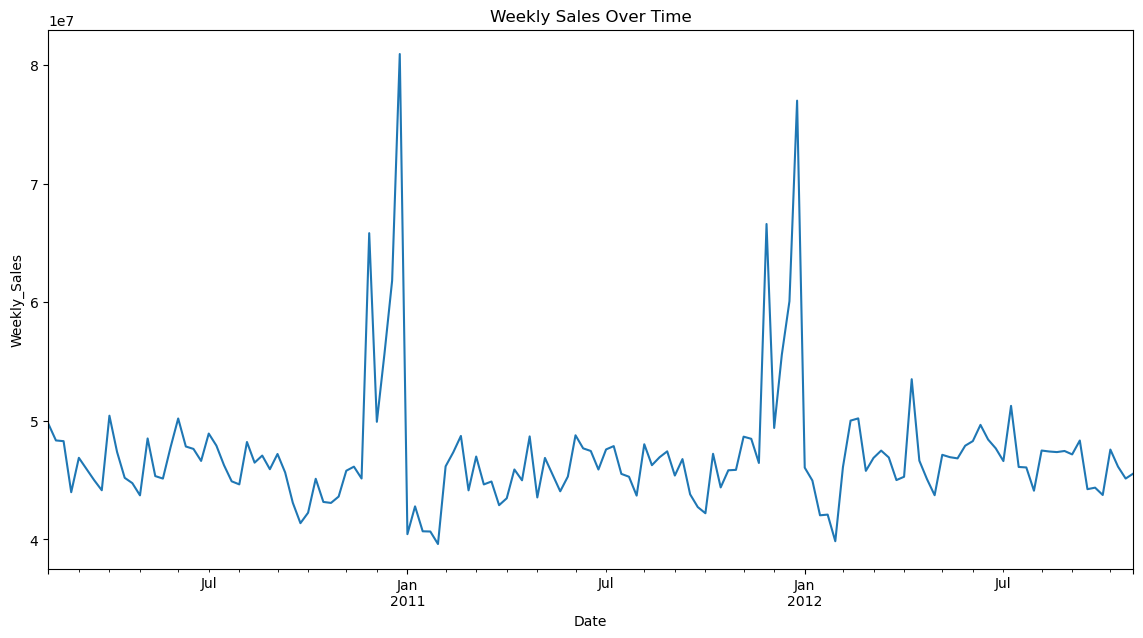

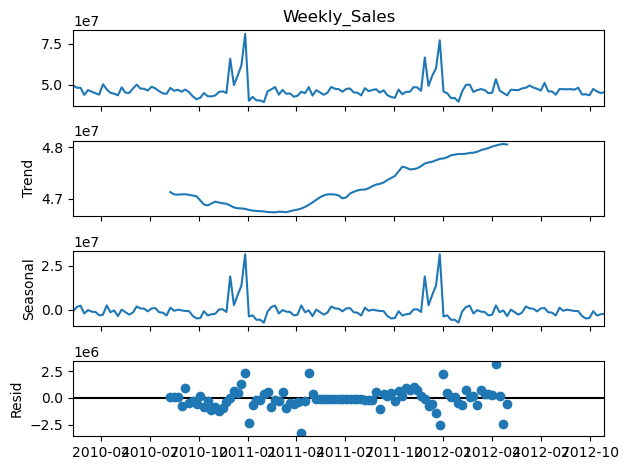

In [28]:
data = pd.read_csv("D:/Study/Data Science/Python/Data Set/Capstone Project - Walmart/Walmart DataSet.csv")
data

# Convert Date column to correct data time format
data["Date"]=pd.to_datetime(data["Date"], dayfirst=True)

# Drop rows with invalid dates
data = data.dropna(subset=['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Plot weekly sales over time
plt.figure(figsize=(14, 7))
data.resample('W').sum()['Weekly_Sales'].plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.show()

# Decompose the time series to observe seasonal patterns
result = seasonal_decompose(data['Weekly_Sales'].resample('W').sum(), model='additive')
result.plot()
plt.show()

# Q3. Does temperature affect the weekly sales in any manner?

Correlation between Weekly Sales and Temperature: -0.06381001317946956


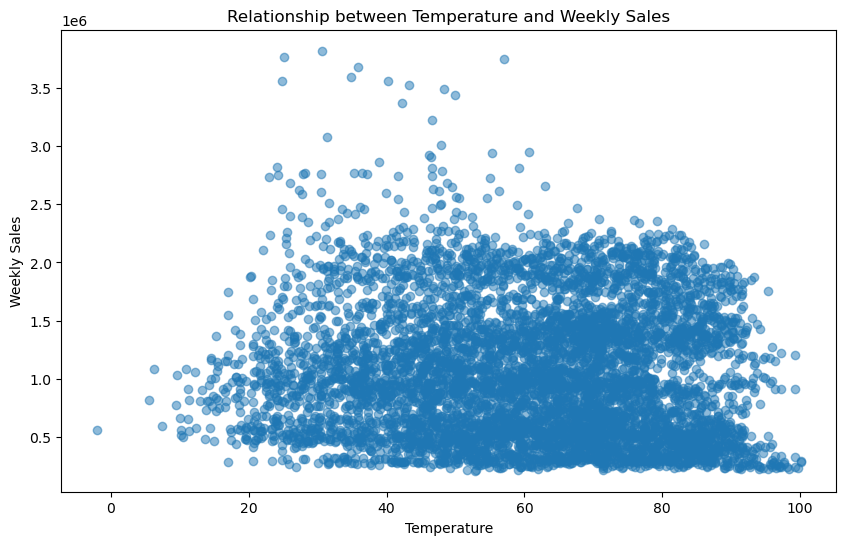

In [13]:
# Calculate the correlation between Weekly Sales and Temperature
correlation = data['Weekly_Sales'].corr(data['Temperature'])

print(f"Correlation between Weekly Sales and Temperature: {correlation}")

# If correlation is non-zero, visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Weekly_Sales'], alpha=0.5)
plt.title('Relationship between Temperature and Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

 - Answer: They have negative corelation, so we can say temperature doses not affect weekly sales

# Q4. How is the Consumer Price index affecting the weekly sales of various stores?

In [14]:
# Create an empty dictionary to store correlation for each store
store_correlation_cpi = {}

# Loop through each unique store
for store in data['Store'].unique():
    # Filter data for the current store
    store_data = data[data['Store'] == store]
    
    # Calculate the correlation between Weekly Sales and CPI
    correlation = store_data['Weekly_Sales'].corr(store_data['CPI'])
    
    # Save the correlation value for this store
    store_correlation_cpi[store] = correlation

# Convert the dictionary to a DataFrame for easy reading
correlation_df_cpi = pd.DataFrame(list(store_correlation_cpi.items()), columns=['Store', 'Sales_CPI_Correlation'])

# Sort the stores by correlation
sorted_stores_cpi = correlation_df_cpi.sort_values(by='Sales_CPI_Correlation')

# Print the correlation results
print("Correlation between Weekly Sales and Consumer Price Index for each store:")
print(sorted_stores_cpi)

Correlation between Weekly Sales and Consumer Price Index for each store:
    Store  Sales_CPI_Correlation
29     36              -0.915095
33     35              -0.424107
44     14              -0.419755
4      30              -0.298188
32     43              -0.285686
23     27              -0.213082
38     18              -0.193541
15     15              -0.174467
10     21              -0.163649
9      19              -0.155341
1      10              -0.115374
34     28              -0.095908
41     29              -0.072530
20      2              -0.062431
36     33              -0.052271
6      22              -0.038602
21     45              -0.023548
8      24              -0.013684
35      6              -0.011357
5      25              -0.010914
22     20               0.058706
28     11               0.069781
40     12               0.084087
7      23               0.084248
42     40               0.113318
16     34               0.115437
13      8               0.120255
27

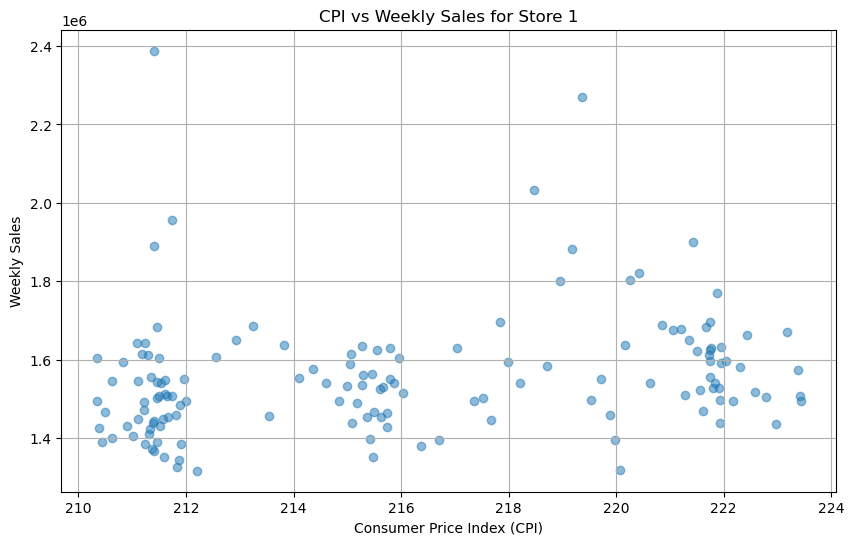

In [15]:
selected_store = 1
store_data = data[data['Store'] == selected_store]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(store_data['CPI'], store_data['Weekly_Sales'], alpha=0.5)
plt.title(f'CPI vs Weekly Sales for Store {selected_store}')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.grid()
plt.show()

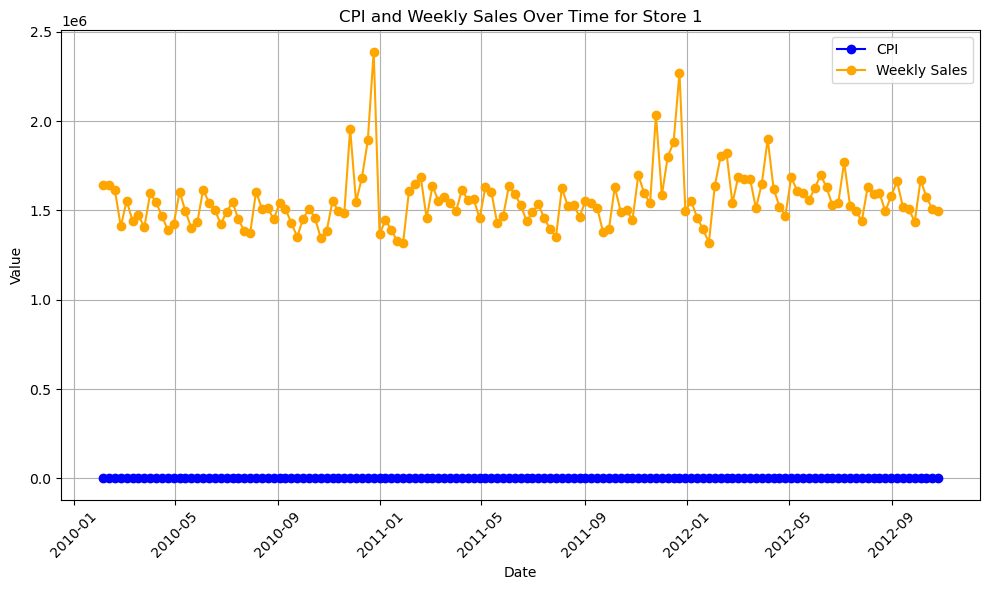

In [16]:
# Create a line plot for CPI and Weekly Sales
plt.figure(figsize=(10, 6))

# Plot CPI
plt.plot(store_data.index, store_data['CPI'], label='CPI', color='blue', marker='o')

# Plot Weekly Sales
plt.plot(store_data.index, store_data['Weekly_Sales'], label='Weekly Sales', color='orange', marker='o')

plt.title(f'CPI and Weekly Sales Over Time for Store {selected_store}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Q5. Top performing stores according to the historical data

In [17]:
# Group the data by Store and sum the Weekly Sales
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the stores by total sales in descending order
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)

# Display the top-performing stores
print("Top Performing Stores based on Total Sales:")
print(top_stores)

Top Performing Stores based on Total Sales:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
11     12  1.442872e+08
25     26  1.434164e+08
33     34  1.382498e+08
39     40  1.378703e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.271689e

# Q6. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [30]:
# Calculate total sales for each store
total_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values()

# Identify the worst-performing store
worst_performing_store = total_sales.idxmin()
worst_performing_sales = total_sales.min()

# Identify the best-performing store
best_performing_store = total_sales.idxmax()
best_performing_sales = total_sales.max()

# Calculate the difference between the best and worst-performing stores
sales_difference = best_performing_sales - worst_performing_sales

print(f"The worst performing store is Store {worst_performing_store} with total sales of {worst_performing_sales}")
print(f"The best performing store is Store {best_performing_store} with total sales of {best_performing_sales}")
print(f"The difference in total sales between the best and worst performing stores is {sales_difference}")


The worst performing store is Store 33 with total sales of 37160221.96
The best performing store is Store 20 with total sales of 301397792.46
The difference in total sales between the best and worst performing stores is 264237570.49999997


C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed

Forecast data for Store 1:
            Forecasted_Sales
2012-11-04      1.531977e+06
2012-11-11      1.530464e+06
2012-11-18      1.528951e+06
2012-11-25      1.527438e+06
2012-12-02      1.525925e+06
2012-12-09      1.524412e+06
2012-12-16      1.522899e+06
2012-12-23      1.521386e+06
2012-12-30      1.519873e+06
2013-01-06      1.518360e+06
2013-01-13      1.516847e+06
2013-01-20      1.515334e+06


Forecast data for Store 10:
            Forecasted_Sales
2012-11-04      1.699995e+06
2012-11-11      1.682301e+06
2012-11-18      1.664608e+06
2012-11-25      1.646915e+06
2012-12-02      1.629221e+06
2012-12-09      1.611528e+06
2012-12-16      1.593835e+06
2012-12-23      1.576142e+06
2012-12-30      1.558448e+06
2013-01-06      1.540755e+06
2013-01-13      1.523062e+06
2013-01-20      1.505369e+06


Forecast data for Store 37:
            Forecasted_Sales
2012-11-04     531435.591696
2012-11-11     531717.174154
2012-11-18     531998.756611
2012-11-25     532280.339068
2012-12-02    

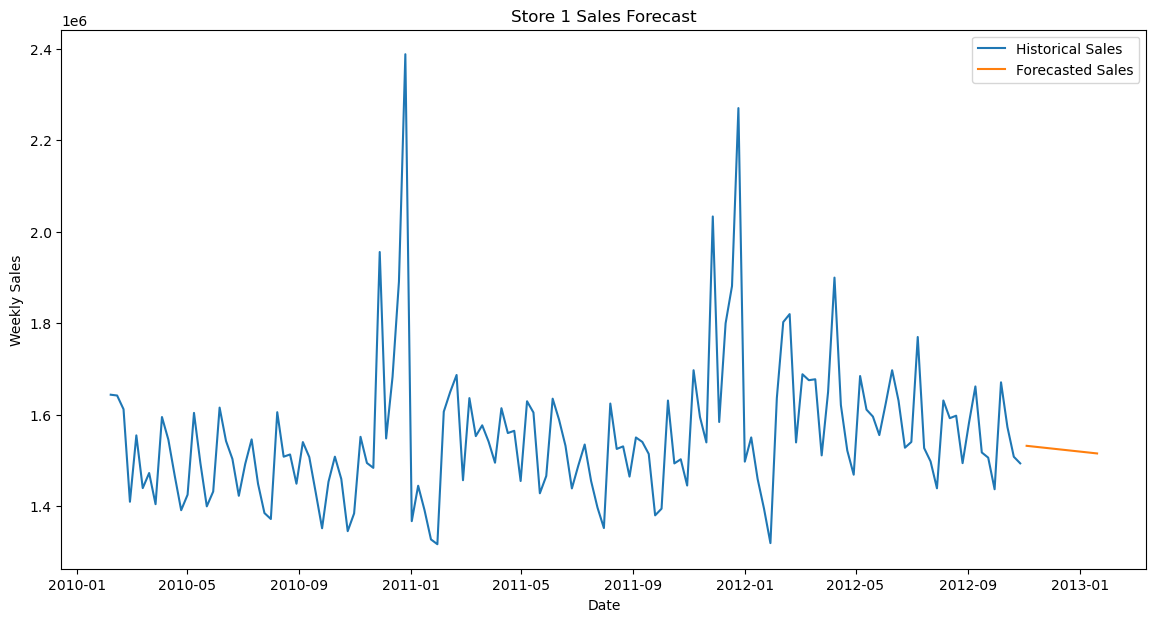

In [19]:
data = pd.read_csv("D:/Study/Data Science/Python/Data Set/Capstone Project - Walmart/Walmart DataSet.csv")
data

# Convert Date column to correct data time format
data["Date"]=pd.to_datetime(data["Date"], dayfirst=True)


# Step 1: Sorting the DataFrame by Date
data = data.sort_values(by='Date')

# Step 2: Defining the Forecasting Function
def forecast_sales(store_data, periods=12):
    # 2.1: Set Date as Index
    store_data = store_data.set_index('Date')
    
    # 2.2: Resample to Weekly Data
    weekly_sales = store_data.resample('W').sum()

    # 2.3: Check for sufficient data points
    if len(weekly_sales) < 20:  # Less than 20 points, model might struggle
        print(f"Not enough data to forecast for store with ID {store_data['Store'].unique()[0]}")
        return pd.DataFrame(index=pd.date_range(start=weekly_sales.index[-1] + timedelta(weeks=1), periods=periods, freq='W'))

    # 2.4: Fit the Exponential Smoothing Model
    model = ExponentialSmoothing(weekly_sales['Weekly_Sales'], trend='add', seasonal=None, seasonal_periods=52).fit()

    # 2.5: Generate the Forecast
    forecast = model.forecast(steps=periods)
    forecast_index = pd.date_range(start=weekly_sales.index[-1] + timedelta(weeks=1), periods=periods, freq='W')
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted_Sales'])

    return forecast_df

# Step 3: Apply Forecasting to All Stores
store_forecasts = {}
for store in data['Store'].unique():
    store_data = data[data['Store'] == store].copy()  # Use copy to avoid modifying the original DataFrame
    store_forecasts[store] = forecast_sales(store_data)

# Step 4: Display Forecast Results
for store, forecast in store_forecasts.items():
    print(f"Forecast data for Store {store}:")
    print(forecast)
    print("\n")

# Step 5: Plot Forecast for a Specific Store
# 5.1: Prepare Data for Plotting
store = 1  # Example: Store ID = 1
store_sales = data[data['Store'] == store].copy()  # Ensure the data is copied and Date column is available
store_sales.set_index('Date', inplace=True)

# 5.2: Create the Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(store_sales.resample('W').sum()['Weekly_Sales'], label='Historical Sales')
plt.plot(store_forecasts[store], label='Forecasted Sales')
plt.title(f'Store {store} Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()
